In [19]:
import pandas as pd

In [20]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [21]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
y = dataset['Exited']

In [25]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']]

In [26]:
#To get dummy variable for categorical variable
geo = pd.get_dummies(dataset['Geography'], drop_first=True)

In [27]:
gender = pd.get_dummies(dataset['Gender'], drop_first=True)

In [28]:
#concat column wise (axis = 1)
X = pd.concat([X, geo, gender], axis = 1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.20, random_state=42)

In [31]:
X_train.shape

(8000, 11)

In [32]:
X_test.shape

(2000, 11)

In [65]:
from keras.models import Sequential 

In [66]:
model = Sequential()

In [67]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [68]:
from keras.layers import Dense

In [69]:
# add first layer : hidden layer
# units : number of neurons in one layer
# activation : activation function 
# input shape/dim: number of input columns
model.add(Dense(units = 8, activation='relu', input_dim=11 ))

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [71]:
#adding second layers
model.add(Dense(units = 6, activation = 'relu' ))

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [73]:
# adding third layer
model.add(Dense(units = 6, activation = 'relu' ))

In [74]:
# fourth layer
model.add(Dense(units = 6, activation = 'relu' ))

In [75]:
#last layer will have only one output, and sigmoid as activation function
# because we need binary classification : sigmoid function
model.add(Dense(units = 1, activation = 'sigmoid' ))

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [77]:
from keras.optimizers import Adam

In [78]:
# loss : checking errors: binary_crossentropy function
# learning_rate hyperparameter
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.000001))

In [79]:
model.get_weights()

[array([[-0.34670508,  0.01113838,  0.0753026 , -0.08457398,  0.4737441 ,
          0.1817894 ,  0.27590716,  0.3379057 ],
        [-0.1868605 , -0.3498141 , -0.00736099, -0.0231576 ,  0.4708565 ,
         -0.28783306,  0.5162913 , -0.21998   ],
        [ 0.4703893 ,  0.12360257, -0.23922178,  0.4296109 ,  0.4590302 ,
          0.13292003, -0.04884392,  0.2629059 ],
        [ 0.09210914,  0.2874381 ,  0.0657509 , -0.031618  ,  0.00832427,
         -0.42030722,  0.5300184 , -0.37244338],
        [ 0.528837  , -0.4060235 ,  0.48367935,  0.22051233,  0.37176156,
          0.30666202, -0.21457568,  0.03818864],
        [-0.47611055,  0.4749015 ,  0.5513025 ,  0.2705186 ,  0.46326166,
         -0.51713765,  0.5039514 , -0.09428698],
        [ 0.3413691 ,  0.28751165,  0.41002268, -0.2709878 ,  0.23616219,
         -0.27865922,  0.23160636,  0.11336809],
        [-0.16374245,  0.0968101 ,  0.34639114, -0.00968778,  0.16401994,
          0.3374188 ,  0.48829228, -0.15794596],
        [ 0.0056

In [80]:
model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_7',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'c

In [81]:
# repeat learning: epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
8000/8000 [==============================] - 1s 168us/step - loss: 1549.2403
Epoch 2/200
8000/8000 [==============================] - 1s 108us/step - loss: 1540.5156
Epoch 3/200
8000/8000 [==============================] - 1s 127us/step - loss: 1531.8088
Epoch 4/200
8000/8000 [==============================] - 1s 105us/step - loss: 1523.1065
Epoch 5/200
8000/8000 [==============================] - 1s 70us/step - loss: 1514.4493
Epoch 6/200
8000/8000 [==============================] - 1s 118us/step - loss: 1505.7997
Epoch 7/200
8000/8000 [==============================] - 1s 121us/step - loss: 1497.1672
Epoch 8/200
8000/8000 [==============================] - 1s 109us/step - loss: 1488.5697
Epoch 9/200
8000/8000 [==============================] - 1s 98us/step - loss: 1479.9971
Epoch 10/200
8000/8000 [==============================] - 1s 144us/step - loss: 1471.4495
Epoch 11/200
8000/8000 [==============================] - 1s 140us/step - loss: 1462.9606
Epoch 12/200
8000/800

8000/8000 [==============================] - 1s 126us/step - loss: 864.3559
Epoch 93/200
8000/8000 [==============================] - 1s 130us/step - loss: 857.9478
Epoch 94/200
8000/8000 [==============================] - 1s 137us/step - loss: 851.5592
Epoch 95/200
8000/8000 [==============================] - 1s 114us/step - loss: 845.1909
Epoch 96/200
8000/8000 [==============================] - 1s 135us/step - loss: 838.8541
Epoch 97/200
8000/8000 [==============================] - 1s 134us/step - loss: 832.5268
Epoch 98/200
8000/8000 [==============================] - 1s 128us/step - loss: 826.2200
Epoch 99/200
8000/8000 [==============================] - 1s 134us/step - loss: 819.9586
Epoch 100/200
8000/8000 [==============================] - 1s 127us/step - loss: 813.7292
Epoch 101/200
8000/8000 [==============================] - 1s 121us/step - loss: 807.5298
Epoch 102/200
8000/8000 [==============================] - 1s 133us/step - loss: 801.3618
Epoch 103/200
8000/8000 [======

8000/8000 [==============================] - 1s 103us/step - loss: 373.2108
Epoch 184/200
8000/8000 [==============================] - 1s 111us/step - loss: 368.7754
Epoch 185/200
8000/8000 [==============================] - 1s 108us/step - loss: 364.3591
Epoch 186/200
8000/8000 [==============================] - 1s 120us/step - loss: 359.9495
Epoch 187/200
8000/8000 [==============================] - 1s 103us/step - loss: 355.5550
Epoch 188/200
8000/8000 [==============================] - 1s 93us/step - loss: 351.1849
Epoch 189/200
8000/8000 [==============================] - 1s 103us/step - loss: 346.8327
Epoch 190/200
8000/8000 [==============================] - 1s 101us/step - loss: 342.5055
Epoch 191/200
8000/8000 [==============================] - 1s 105us/step - loss: 338.1921
Epoch 192/200
8000/8000 [==============================] - 1s 93us/step - loss: 333.8975
Epoch 193/200
8000/8000 [==============================] - 1s 98us/step - loss: 329.6208
Epoch 194/200
8000/8000 [==

In [82]:
# shows loss in every training
model.history.history

{'loss': [1549.24031149292,
  1540.5156468811035,
  1531.8088204040528,
  1523.1065329589844,
  1514.4492524414063,
  1505.7997321166993,
  1497.1672133789064,
  1488.5697400512695,
  1479.997147216797,
  1471.4495061645507,
  1462.9606455688477,
  1454.504776702881,
  1446.078863067627,
  1437.6928836669922,
  1429.348201347351,
  1421.0193197021486,
  1412.7244974365235,
  1404.4518452148438,
  1396.2036008300781,
  1387.9857276916505,
  1379.8105339050294,
  1371.6644082946777,
  1363.5435543518067,
  1355.431269268036,
  1347.332639038086,
  1339.2685572509765,
  1331.2405622558595,
  1323.2594194335938,
  1315.2934475097657,
  1307.3556615600587,
  1299.4550627441406,
  1291.577040725708,
  1283.7362496337892,
  1275.927600830078,
  1268.1344962158203,
  1260.3526617431642,
  1252.6120842895507,
  1244.8873836669923,
  1237.1968618164062,
  1229.525073791504,
  1221.8837215576173,
  1214.2444688110352,
  1206.6302009887695,
  1199.0554852905273,
  1191.4991351318358,
  1183.974610

In [83]:
l = pd.DataFrame(model.history.history)

<AxesSubplot:>

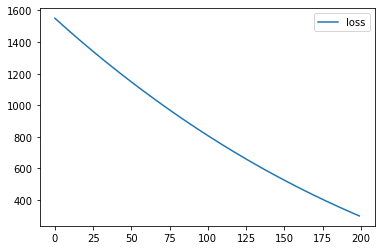

In [84]:
l.plot()